<a href="https://colab.research.google.com/github/benjamin-milhet/GHYS_MILHET_TD/blob/main/GHYS_MILHET_TD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ensemble d'operations utile pour la suite du projet
class operations:

    def concat(self, chaine):
        """
          Ajoute un point d'exclamation à la fin d'une phrase donner en parametre

          Parameters
          ----------
          chaine : String
              Phrase à laquelle ajouter un point d'exclamation

          Returns
          ----------
          String
              Phrase avec un point d'exclamation à la fin
        """
        return chaine+" !"

    def cumul(self, list):
        """
          Fait la somme de tous les nombres comprit dans la liste

          Parameters
          ----------
          list : list
              Liste de nombre

          Returns
          ----------
          int
              Somme de tous les nombres de la liste
        """
        res = 0
        for i in list:
            if isinstance(i, int):
                res += i
        return res

    def factorielle(self, facto):
        """
          Calcul la factorielle d'un nombre de facon recursive

          Parameters
          ----------
          facto : int
              Nombre entier auquelle on calcule ca factorielle

          Returns
          ----------
          int
              Facorielle du nombre donner en parametre
        """
        if facto == 1:
            return facto
        else:
            return facto * self.factorielle(facto - 1)

In [2]:
# Classe representant une personne avec un nom et son age et permettant de savoirt si elle est majeur ou non
class Personne:

    def __init__(self, nom, age):
        self.nom = nom
        self.age = age

    def isMajeur(self):
        """
          Permet de savoir si la personne est majeur ou non

          Returns
          ----------
          boolean
              Retourne True si la personne est majeur sinon False
        """
        return self.age >= 18

    def __str__(self):
        """
          Permet d'obtenir le détail d'une personne

          Returns
          ----------
          String
              Retourne une phrase de description de la personne
        """
        res = self.nom + " ; " + str(self.age)
        if self.isMajeur():
            res += " -> majeur"
        else:
            res += " -> mineur"
        return res


In [3]:
def main():
    """
        Fonction main pour tester les class operations et Personne

    """
    test = operations()
    print(test.concat("hello world"))
    print(test.cumul([1,2,3,"test"]))
    print(test.factorielle(5))

    p1 = Personne("jean", 20)
    p2 = Personne("jeanne", 5)

    print(p1)
    print(p2)


if __name__ == '__main__':
    main()


hello world !
6
120
jean ; 20 -> majeur
jeanne ; 5 -> mineur


In [5]:
import pandas as pd # Importation de la librairie pandas

data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv") # Importation des donnees du fichier tips.csv a l'aide de la librairie pandas
print(data) # Affichage des donnees

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


In [6]:
# La fonction replace permet de remplacer les donnees de type String en valeur int
dataBis = data.replace(['Female', 'Male'], [0, 1])
dataBis = dataBis.replace(['No', 'Yes'], [0, 1])
dataBis = dataBis.replace(['Dinner', 'Lunch'], [0, 1])
dataBis = dataBis.replace(['Sun', 'Fri', 'Thur', 'Sat'], [0, 1, 2, 3])
print(dataBis)

     total_bill   tip  sex  smoker  day  time  size
0         16.99  1.01    0       0    0     0     2
1         10.34  1.66    1       0    0     0     3
2         21.01  3.50    1       0    0     0     3
3         23.68  3.31    1       0    0     0     2
4         24.59  3.61    0       0    0     0     4
..          ...   ...  ...     ...  ...   ...   ...
239       29.03  5.92    1       0    3     0     3
240       27.18  2.00    0       1    3     0     2
241       22.67  2.00    1       1    3     0     2
242       17.82  1.75    1       0    3     0     2
243       18.78  3.00    0       0    2     0     2

[244 rows x 7 columns]


In [7]:
import numpy as np # Importation de la librairie numpy

loss = np.zeros((51, 51), np.uint32) # Initialisation de l'ensemble des loss a 0

for w1 in range(-25, 26): # On parcout toutes les valeurs de w1
  for w2 in range(-25, 26): # On parcout toutes les valeurs de w2
    e = 0
    y = 0
    for i in range(243): # On parcourt l'ensemble des valeurs de total_bill
      t = 0
      #Calcul de ma loss pour chacune des valeurs
      temp1 = float(dataBis.loc[i, "total_bill"]) * w1
      temp2 = dataBis.loc[i, "sex"] * w2
      y += temp1 + temp2
      t += dataBis.loc[i, "tip"]
      tempo = y - t
      e += ((tempo * tempo)/2)
    loss[w1+25][w2+25] = e/dataBis.size


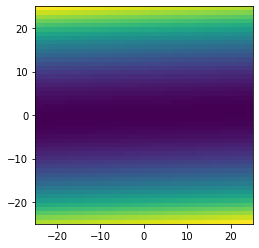

In [8]:
import matplotlib.pyplot as plt # Importation de la librairie matplotlib.pyplot

plt.imshow(loss, extent=[-25,25,-25,25]) # Affichage des valeurs des loss calculees precedentes


In [9]:
import sklearn as sk # Importation de la librairie sklearn

y = dataBis.get("tip") # Recuperation de la colonne tip
print(y) # Affichage des informations compris dans y

x = dataBis.drop("tip", axis='columns') # Recuperation de toutes les colonnes sauf la colonne tip
print(x) # Affichage des informations compris dans x

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64
     total_bill  sex  smoker  day  time  size
0         16.99    0       0    0     0     2
1         10.34    1       0    0     0     3
2         21.01    1       0    0     0     3
3         23.68    1       0    0     0     2
4         24.59    0       0    0     0     4
..          ...  ...     ...  ...   ...   ...
239       29.03    1       0    3     0     3
240       27.18    0       1    3     0     2
241       22.67    1       1    3     0     2
242       17.82    1       0    3     0     2
243       18.78    0       0    2     0     2

[244 rows x 6 columns]


In [10]:
from sklearn.model_selection import train_test_split # Importation de train_test_spli depuis la librairie sklearn.model_selection

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10) # Separation des donnees en deux parties, une pour l'entrainement des donnees (90%) et une autre pour une phase de test (10%)
# Affichage des donnees
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     total_bill  sex  smoker  day  time  size
186       20.90    0       1    0     0     3
118       12.43    0       0    2     1     2
142       41.19    1       0    2     1     5
193       15.48    1       1    2     1     2
207       38.73    1       1    3     0     4
..          ...  ...     ...  ...   ...   ...
88        24.71    1       0    2     1     2
65        20.08    1       0    3     0     3
125       29.80    0       0    2     1     6
31        18.35    1       0    3     0     4
39        31.27    1       0    3     0     3

[219 rows x 6 columns]
     total_bill  sex  smoker  day  time  size
242       17.82    1       0    3     0     2
107       25.21    1       1    3     0     2
176       17.89    1       1    0     0     2
44        30.40    1       0    0     0     4
227       20.45    1       0    3     0     4
0         16.99    0       0    0     0     2
102       44.30    0       1    3     0     3
202       13.00    0       1    2     1     2
127       

In [11]:
# Declaration des constantes pour le Perceptron
NUMBER_OF_INPUTS = 6
LEARNING_RATE = 0.001 
LOSS_CLAMPING = 1
RELU_CLAMPING = 3
# Declaration des constantes pour l'amelioration du Perceptron
EPOCH = 50

In [14]:
class Perceptron:
  def __init__(self, inputs, learning_rate):
        self.inputs = inputs
        self.learning_rate = learning_rate
        self.weights = np.zeros(self.inputs+1)
  
  def predict_relu(self, inputList):
    """
          Permet de calculer la somme des produits des inputs et des poids

          Parameters
          ----------
          inputList : int
              Ensemble des valeurs d'entrée

          Returns
          ----------
          float
              Somme des produits des inputs et des poids
    """
    res = 0.0 # Initialisation de la variable res a 0
    for i in range(len(inputList)-1): # Parcours de l'ensemble des inputs
      res += inputList[i] * self.weights[i] # Calcul de la somme des produits des inputs et des poids
    if res > RELU_CLAMPING : return res 
    else : return RELU_CLAMPING 

  def compute_loss(self, y, t):
    """
          Permet de calculer la loss

          Parameters
          ----------
          y : int
              Valeur de sortie
          t : int
              Valeur attendue

          Returns
          ----------
          float
              Loss
    """
    temp = y - t
    res = (temp * temp)/2
    if res > LOSS_CLAMPING : return res
    else : return LOSS_CLAMPING
  
  def update_weights(self, x, y, t):
    """
          Permet de mettre a jour les poids

          Parameters
          ----------
          x : int
              Ensemble des valeurs d'entrée
          y : int
              Valeur de sortie
          t : int
              Valeur attendue
    """
    for i in range(len(self.weights)-1):
      self.weights[i] = self.weights[i] + (y - t) * x[i] * self.learning_rate

  def train(self, x_train, y_train):
    """
          Permet d'entrainer le perceptron

          Parameters
          ----------
          x_train : int
              Ensemble des valeurs d'entrée pour l'entrainement
          y_train : int
              Ensemble des valeurs de sortie pour l'entrainement
    """
    for i in range(EPOCH):
      x_train = np.c_[x_train]
      for (x, y) in zip(x_train, y_train):
        t = self.predict_relu(x)
        if t != y:
          self.update_weights(x, y, t)

  def evaluate(self, x_test, y_test):
    """
          Permet d'evaluer le perceptron

          Parameters
          ----------
          x_test : int
              Ensemble des valeurs d'entrée pour l'evaluation
          y_test : int
              Ensemble des valeurs de sortie pour l'evaluation
    """
    listPrecision = []
    x_test = np.c_[x_test]
    for (x_test, y_test) in zip(x_test, y_test):
      t = self.predict_relu(x_test)

      temp = abs(y_test - t)/t
      precision = 1 - temp
      listPrecision.append(precision)

    print(sum(listPrecision)/len(listPrecision))

In [16]:
perceptron = Perceptron(NUMBER_OF_INPUTS, LEARNING_RATE)
perceptron.train(x_train, y_train)
perceptron.evaluate(x_test, y_test)

0.5623991552015343
